In [10]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [40]:
df_FW = pd.read_csv(r'C:\Users\JayNB\OneDrive\เดสก์ท็อป\NIDA\ML_QUIZ\log2.csv')

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
# สร้างตัวแปรทำนาย (X: Independents) และตัวแปรเป้าหมาย (Y: Target label) สำหรับ Decision Tree model

X = df_FW[["Destination Port","NAT Source Port","NAT Destination Port", "Bytes","pkts_sent","pkts_received","Elapsed Time (sec)"]]
Y = df_FW['Action']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=55)

3894      deny
1321      drop
3435     allow
21370     drop
32462    allow
         ...  
970       deny
8259     allow
10326    allow
24342     deny
54814     drop
Name: Action, Length: 19660, dtype: object

In [59]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

1. Decision Tree with Grid Search CV

In [55]:
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import warnings
from sklearn.metrics import classification_report, confusion_matrix
warnings.filterwarnings('ignore')

In [31]:
%%time
dtree = DecisionTreeClassifier()
dtree.fit(X_train_ss, y_train)
pred = dtree.predict(X_test_ss)
print(classification_report(y_test, pred))
print('\n')
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

       allow       1.00      1.00      1.00     11378
        deny       1.00      1.00      1.00      4452
        drop       1.00      1.00      1.00      3811
  reset-both       0.82      0.74      0.78        19

    accuracy                           1.00     19660
   macro avg       0.95      0.93      0.94     19660
weighted avg       1.00      1.00      1.00     19660



[[11377     1     0     0]
 [    0  4437    12     3]
 [    0     0  3811     0]
 [    0     5     0    14]]
CPU times: total: 141 ms
Wall time: 501 ms


Grid Search CV

In [56]:
tree_param = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.0,0.1, .01, .001],
              'max_depth' : range(0,15),
              'criterion' :['gini', 'entropy']
             }

In [58]:
tree_clas = DecisionTreeClassifier(random_state=123)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=tree_param, cv=5, verbose=True)
grid_search.fit(X_train_ss,y_train)
tree_pred= grid_search.best_estimator_.predict(X_test_ss)


NameError: name 'X_train_ss' is not defined

In [37]:
print(confusion_matrix(y_test,tree_pred))
print(classification_report(y_test,tree_pred))
tree_acc = accuracy_score(y_test,tree_pred)

[[11377     1     0     0]
 [    2  4438    12     0]
 [    0     0  3811     0]
 [    0     8     0    11]]
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00     11378
        deny       1.00      1.00      1.00      4452
        drop       1.00      1.00      1.00      3811
  reset-both       1.00      0.58      0.73        19

    accuracy                           1.00     19660
   macro avg       1.00      0.89      0.93     19660
weighted avg       1.00      1.00      1.00     19660



In [36]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=14, max_features='auto', random_state=123)

2.KNN 

In [63]:
# นำเข้า KNN Classifier

from sklearn.neighbors import KNeighborsClassifier

In [33]:
KNN = KNeighborsClassifier(n_neighbors = 1)

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(n_neighbors=range(0,15),weights=['uniform', 'distance'],algorithm=['auto', 'kd_tree','ball_tree'])

knn = KNeighborsClassifier()

knn_CV = GridSearchCV(knn, param_grid=param_grid, cv= 5)

knn_CV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kd_tree', 'ball_tree'],
                         'n_neighbors': range(0, 15),
                         'weights': ['uniform', 'distance']})

In [40]:
knn_CV.best_params_
bestKNN = knn_CV.best_estimator_

In [41]:
bestKNN.fit(X_train, y_train)
pred = bestKNN.predict(X_test)
print(classification_report(y_test, pred))
print('\n')
print(confusion_matrix(y_test, pred))


KNeighborsClassifier(n_neighbors=9, weights='distance')

In [43]:
print(classification_report(y_test, pred))
print('\n')
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

       allow       1.00      1.00      1.00     11378
        deny       1.00      1.00      1.00      4452
        drop       1.00      1.00      1.00      3811
  reset-both       0.79      0.58      0.67        19

    accuracy                           1.00     19660
   macro avg       0.94      0.89      0.92     19660
weighted avg       1.00      1.00      1.00     19660



[[11366    12     0     0]
 [    5  4432    12     3]
 [    0     0  3811     0]
 [    6     2     0    11]]


In [44]:
error_rate = []

for i in range(1,35):
    
    KNN = KNeighborsClassifier(n_neighbors = i)
    KNN.fit(X_train, y_train)
    pred_i = KNN.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

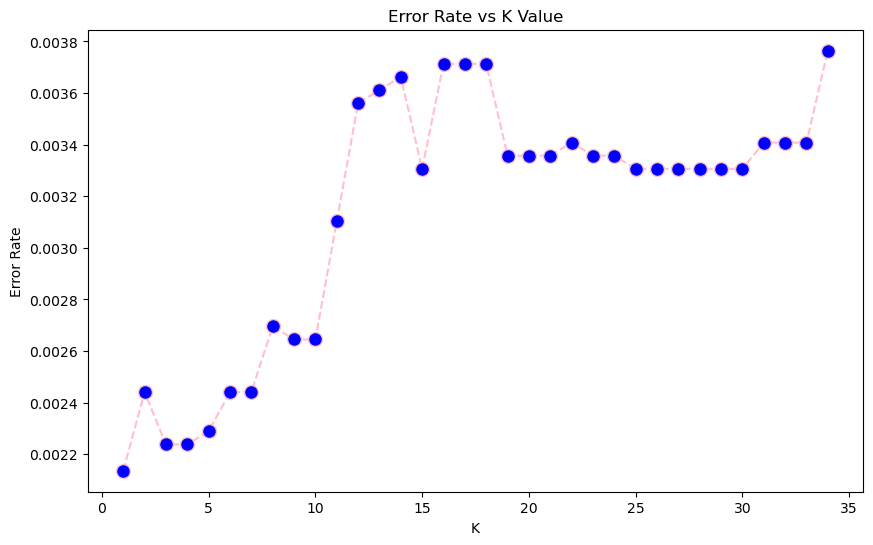

In [45]:

plt.figure(figsize = (10,6))
plt.plot(range(1,35), error_rate, color = 'pink', linestyle = 'dashed', marker = 'o',
        markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [46]:
KNN = KNeighborsClassifier(n_neighbors = 1)
KNN.fit(X_train, y_train)
pred = KNN.predict(X_test)

print(classification_report(y_test, pred))
print('\n')
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

       allow       1.00      1.00      1.00     11378
        deny       1.00      1.00      1.00      4452
        drop       1.00      1.00      1.00      3811
  reset-both       0.68      0.68      0.68        19

    accuracy                           1.00     19660
   macro avg       0.92      0.92      0.92     19660
weighted avg       1.00      1.00      1.00     19660



[[11364    14     0     0]
 [    4  4430    12     6]
 [    0     0  3811     0]
 [    4     2     0    13]]


3.Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pre_rf = rf.predict(X_test)
print(classification_report(y_test, pre_rf))
print('\n')
print(confusion_matrix(y_test, pre_rf))

              precision    recall  f1-score   support

       allow       1.00      1.00      1.00     11378
        deny       1.00      1.00      1.00      4452
        drop       1.00      1.00      1.00      3811
  reset-both       0.92      0.58      0.71        19

    accuracy                           1.00     19660
   macro avg       0.98      0.89      0.93     19660
weighted avg       1.00      1.00      1.00     19660



[[11377     1     0     0]
 [    0  4439    12     1]
 [    0     0  3811     0]
 [    0     8     0    11]]


In [53]:
param_grid = {
    'max_features': [4,6,8],
    'min_samples_leaf': [1,3,5],
    'min_samples_split': [2,5,12],
    'n_estimators': [10,100,300,500]
}

In [54]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, verbose = 3)

In [55]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.999 total time=   0.1s
[CV 2/5] END max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.998 total time=   0.1s
[CV 3/5] END max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.999 total time=   0.1s
[CV 4/5] END max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.999 total time=   0.2s
[CV 5/5] END max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.998 total time=   0.1s
[CV 1/5] END max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.999 total time=   1.8s
[CV 2/5] END max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.998 total time=   1.7s
[CV 3/5] END max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.999 t

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': [4, 6, 8],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 12],
                         'n_estimators': [10, 100, 300, 500]},
             verbose=3)

In [56]:
grid_search.best_params_
best = grid_search.best_estimator_

In [57]:
rf_fine = best
rf_fine.fit(X_train, y_train)
predictions = rf_fine.predict(X_test)

In [58]:
grid_search.best_params_

{'max_features': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [59]:
# สั่งพิมพ์รายงาน ค่าการวัดผล และประสิทธิภาพการทำนายของตัวแบบ และค่าใน confusion matrix

print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

       allow       1.00      1.00      1.00     11378
        deny       1.00      1.00      1.00      4452
        drop       1.00      1.00      1.00      3811
  reset-both       0.92      0.58      0.71        19

    accuracy                           1.00     19660
   macro avg       0.98      0.89      0.93     19660
weighted avg       1.00      1.00      1.00     19660



[[11377     1     0     0]
 [    0  4439    12     1]
 [    0     0  3811     0]
 [    0     8     0    11]]


4.XGBOOST 

In [15]:
X_XG = df_FW[["Destination Port","NAT Source Port","NAT Destination Port", "Bytes","pkts_sent","Elapsed Time (sec)"]]

df_FW['Action'] = df_FW.Action.replace(['allow', 'drop', 'deny', 'reset-both'],['1','2','3','4'])
Y_XG = df_FW[['Action']]

In [18]:
import xgboost as xgb
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


# Encode y to numeric
y_encoded = OrdinalEncoder().fit_transform(Y_XG)
# Extract text features
cats = X.select_dtypes(exclude=np.number).columns.tolist()

# Convert to Pandas category
for col in cats:
   X[col] = X[col].astype('category')
   
# Split the data
X_train_XG, X_test_XG, y_train_XG, y_test_XG = train_test_split(X_XG, y_encoded, random_state=37, stratify=y_encoded)


In [28]:

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,f1_score
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train_XG, y_train_XG)


# Make predictions on the test set
y_pred_XG = xgb_classifier.predict(X_test_XG)

# Generate the classification report
report = classification_report(y_test_XG, y_pred_XG)
print(classification_report(y_test_XG, y_pred_XG))
print('\n')
print(confusion_matrix(y_test_XG, y_pred_XG))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9410
         1.0       1.00      1.00      1.00      3213
         2.0       1.00      1.00      1.00      3747
         3.0       1.00      0.85      0.92        13

    accuracy                           1.00     16383
   macro avg       1.00      0.96      0.98     16383
weighted avg       1.00      1.00      1.00     16383



[[9409    0    1    0]
 [   0 3213    0    0]
 [   0    9 3738    0]
 [   0    0    2   11]]


In [47]:
print("Before OverSampling, counts 'allow': {}".format(sum(y_train =='allow')))
print("Before OverSampling, counts 'deny': {} ".format(sum(y_train == 'deny')))
print("Before OverSampling, counts 'drop': {} ".format(sum(y_train == 'drop')))
print("Before OverSampling, counts 'reset-both': {} \n".format(sum(y_train == 'reset-both')))

Before OverSampling, counts 'allow': 26262
Before OverSampling, counts 'deny': 10535 
Before OverSampling, counts 'drop': 9040 
Before OverSampling, counts 'reset-both': 35 



Balance Data

In [48]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state = 37).fit_resample(X_train, y_train)

In [51]:
# แสดงจำนวนหลังสุ่ม OverSampling

print("After OverSampling, counts 'allow': {}".format(sum(y_resampled == 'allow')))
print("After OverSampling, counts 'deny': {} ".format(sum(y_resampled == 'deny')))
print("After OverSampling, counts 'drop': {} ".format(sum(y_resampled == 'drop')))
print("After OverSampling, counts 'reset-both': {} \n".format(sum(y_resampled == 'reset-both')))

After OverSampling, counts 'allow': 26262
After OverSampling, counts 'deny': 26262 
After OverSampling, counts 'drop': 26262 
After OverSampling, counts 'reset-both': 26262 



In [60]:
from sklearn.model_selection import GridSearchCV
tree_clas = DecisionTreeClassifier(random_state=123)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=tree_param, cv=5, verbose=True)
grid_search.fit(X_resampled,y_resampled)
tree_pred= grid_search.best_estimator_.predict(X_test)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


In [61]:
print(confusion_matrix(y_test,tree_pred))
print(classification_report(y_test,tree_pred))
tree_acc = accuracy_score(y_test,tree_pred)

[[11377     1     0     0]
 [    2  4261    12   177]
 [    0     0  3811     0]
 [    0     4     0    15]]
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00     11378
        deny       1.00      0.96      0.98      4452
        drop       1.00      1.00      1.00      3811
  reset-both       0.08      0.79      0.14        19

    accuracy                           0.99     19660
   macro avg       0.77      0.94      0.78     19660
weighted avg       1.00      0.99      0.99     19660



In [64]:
param_grid = dict(n_neighbors=range(0,15),weights=['uniform', 'distance'],algorithm=['auto', 'kd_tree','ball_tree'])

knn = KNeighborsClassifier()

knn_CV = GridSearchCV(knn, param_grid=param_grid, cv= 5)

knn_CV.fit(X_resampled, y_resampled)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kd_tree', 'ball_tree'],
                         'n_neighbors': range(0, 15),
                         'weights': ['uniform', 'distance']})

In [65]:
knn_CV.best_params_
bestKNN = knn_CV.best_estimator_

In [66]:
bestKNN.fit(X_resampled, y_resampled)
pred = bestKNN.predict(X_test)
print(classification_report(y_test, pred))
print('\n')
print(confusion_matrix(y_test, pred))


              precision    recall  f1-score   support

       allow       1.00      1.00      1.00     11378
        deny       1.00      0.98      0.99      4452
        drop       1.00      1.00      1.00      3811
  reset-both       0.14      0.89      0.24        19

    accuracy                           0.99     19660
   macro avg       0.78      0.97      0.81     19660
weighted avg       1.00      0.99      0.99     19660



[[11341     9     0    28]
 [   10  4353    12    77]
 [    0     0  3811     0]
 [    0     2     0    17]]


In [67]:
rf = RandomForestClassifier()
rf.fit(X_resampled, y_resampled)
pre_rf = rf.predict(X_test)
print(classification_report(y_test, pre_rf))
print('\n')
print(confusion_matrix(y_test, pre_rf))

              precision    recall  f1-score   support

       allow       1.00      1.00      1.00     11378
        deny       1.00      0.99      0.99      4452
        drop       1.00      1.00      1.00      3811
  reset-both       0.32      0.84      0.46        19

    accuracy                           1.00     19660
   macro avg       0.83      0.96      0.86     19660
weighted avg       1.00      1.00      1.00     19660



[[11377     1     0     0]
 [    0  4406    12    34]
 [    0     0  3811     0]
 [    0     3     0    16]]


In [69]:
from imblearn.over_sampling import SMOTE
X_resampled_XG, y_resampled_XG = SMOTE(random_state = 37).fit_resample(X_train_XG, y_train_XG)

In [70]:

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,f1_score
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_resampled_XG, y_resampled_XG)


# Make predictions on the test set
y_pred_XG = xgb_classifier.predict(X_test_XG)

# Generate the classification report
report = classification_report(y_test_XG, y_pred_XG)
print(classification_report(y_test_XG, y_pred_XG))
print('\n')
print(confusion_matrix(y_test_XG, y_pred_XG))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9410
         1.0       1.00      1.00      1.00      3213
         2.0       1.00      0.99      0.99      3747
         3.0       0.21      0.92      0.34        13

    accuracy                           1.00     16383
   macro avg       0.80      0.98      0.83     16383
weighted avg       1.00      1.00      1.00     16383



[[9409    0    1    0]
 [   0 3213    0    0]
 [   0    9 3692   46]
 [   0    0    1   12]]


In [71]:
from yellowbrick.classifier import ROCAUC

def plot_ROC_curve(estimator, X_train_XG, y_train_XG, X_test_XG, y_test_XG):
  visualizer = ROCAUC(estimator, encoder={0: 'allow', 
                                    1: 'drop', 
                                    2: 'deny',
                                    3: 'reset-both'})
  visualizer.fit(X_train_XG, y_train_XG)
  visualizer.score(X_test_XG, y_test_XG)
  visualizer.show()
  
  return visualizer

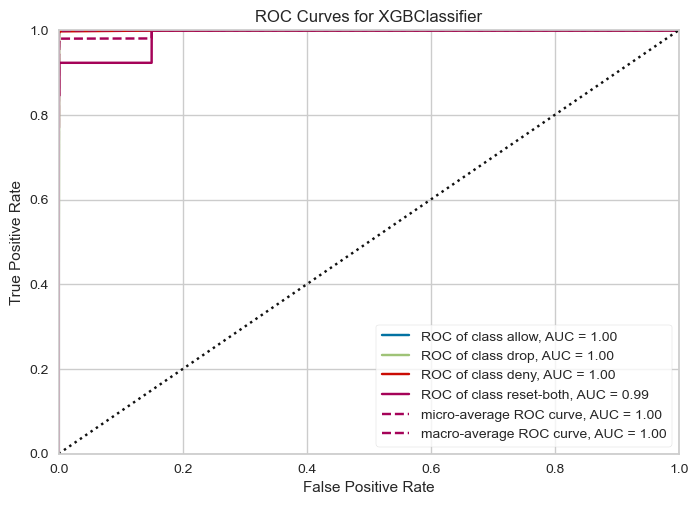

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'allow', 1: 'drop', 2: 'deny', 3: 'reset-both'},
       estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=F...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))

In [75]:
plot_ROC_curve(xgb_classifier,X_resampled_XG, y_resampled_XG, X_test_XG, y_test_XG)


